In [1]:
#so here is the gist
# A mask R-CNN model has been trained on a dataset and the results available (ground truth label and model predicted
# masks for every image available. Both of these labels are saved as a numpy files, we can also look at it as a pickle file)
# What I want to do is to refine the masks with a given approach I have in mind. The approach takes in as input
#both the image and confidence map(Challenged here). I am failing to reconstruct the contours of the masks
#and to come up with confidence map to use it in refinement of the masks.

# Here is a little code I have written and may serve as start up.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pickle

In [3]:
im=np.load("PASCALlutW.npy")

In [4]:
np.shape(im)

(256, 1, 3)

In [5]:
im=im.reshape(16,16,3)

In [6]:
np.shape(im)

(16, 16, 3)

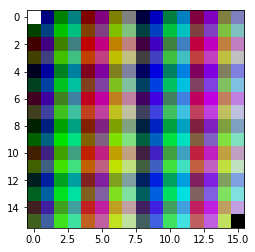

In [7]:
im=plt.imshow(im)

In [8]:
im1=np.load("1-10-0010.npy",allow_pickle=True)

In [9]:
im11=pickle.load(open("1-10-0010.npy","rb"))

In [10]:
type(im11)

list

In [11]:
np.shape(im1)

(49, 65, 2)

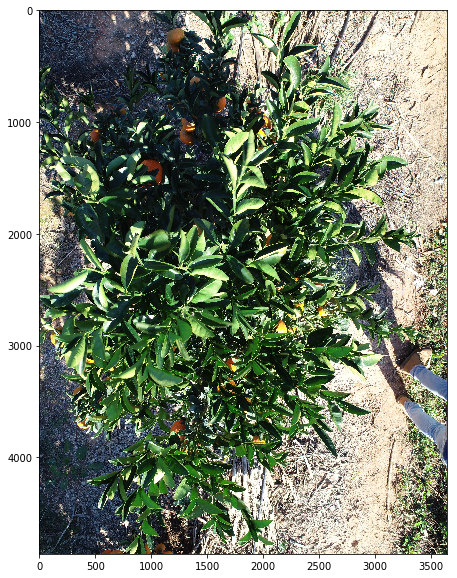

In [12]:
im2=cv.imread("1-10-0010.jpg")
im4=cv.cvtColor(im2,cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.axis()
im3=plt.imshow(im4,cmap="gray")

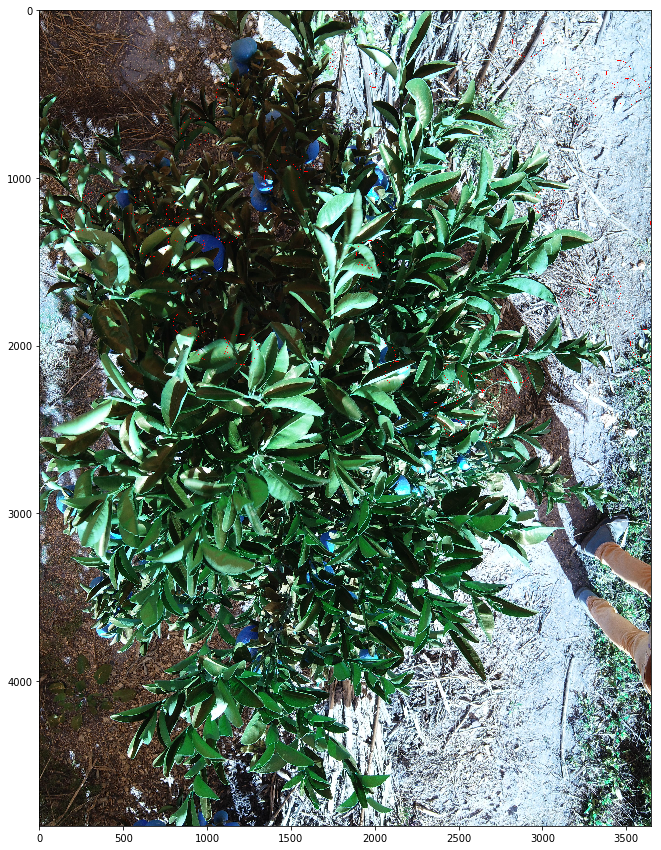

In [13]:
pt=np.load("1-10-0010.npy",allow_pickle=True)
pts=np.array(pt[::-1])
imm=cv.drawContours(im2, contours=np.int32(pts),contourIdx=-1,color=(255,0,0))
plt.figure(figsize=(15,15))
plt.imshow(imm)

In [14]:
pt = np.load("1-10-0010.npy",allow_pickle=True)

In [15]:
np.array(pt)

array([[[2402.        , 2378.        ],
        [2401.81220434, 2374.17733153],
        [2401.25062594, 2370.39147744],
        ...,
        [2401.25062594, 2385.60852256],
        [2401.81220434, 2381.82266847],
        [2402.        , 2378.        ]],

       [[2522.        , 2489.        ],
        [2521.74479051, 2483.80509156],
        [2520.98161986, 2478.66021293],
        ...,
        [2520.98161986, 2499.33978707],
        [2521.74479051, 2494.19490844],
        [2522.        , 2489.        ]],

       [[2126.        , 2060.        ],
        [2125.64366977, 2052.74673162],
        [2124.57811075, 2045.56331617],
        ...,
        [2124.57811075, 2074.43668383],
        [2125.64366977, 2067.25326838],
        [2126.        , 2060.        ]],

       ...,

       [[2525.        , 2158.        ],
        [2524.73034469, 2152.51104014],
        [2523.9239757 , 2147.07494197],
        ...,
        [2523.9239757 , 2168.92505803],
        [2524.73034469, 2163.48895986],
        [

In [18]:
pts

array([[[2934.        , 2141.        ],
        [2933.60514759, 2132.96259449],
        [2932.42439299, 2125.00259359],
        ...,
        [2932.42439299, 2156.99740641],
        [2933.60514759, 2149.03740551],
        [2934.        , 2141.        ]],

       [[2616.        , 2221.        ],
        [2615.72071415, 2215.31500586],
        [2614.88554626, 2209.68476132],
        ...,
        [2614.88554626, 2232.31523868],
        [2615.72071415, 2226.68499414],
        [2616.        , 2221.        ]],

       [[2525.        , 2158.        ],
        [2524.73034469, 2152.51104014],
        [2523.9239757 , 2147.07494197],
        ...,
        [2523.9239757 , 2168.92505803],
        [2524.73034469, 2163.48895986],
        [2525.        , 2158.        ]],

       ...,

       [[2126.        , 2060.        ],
        [2125.64366977, 2052.74673162],
        [2124.57811075, 2045.56331617],
        ...,
        [2124.57811075, 2074.43668383],
        [2125.64366977, 2067.25326838],
        [

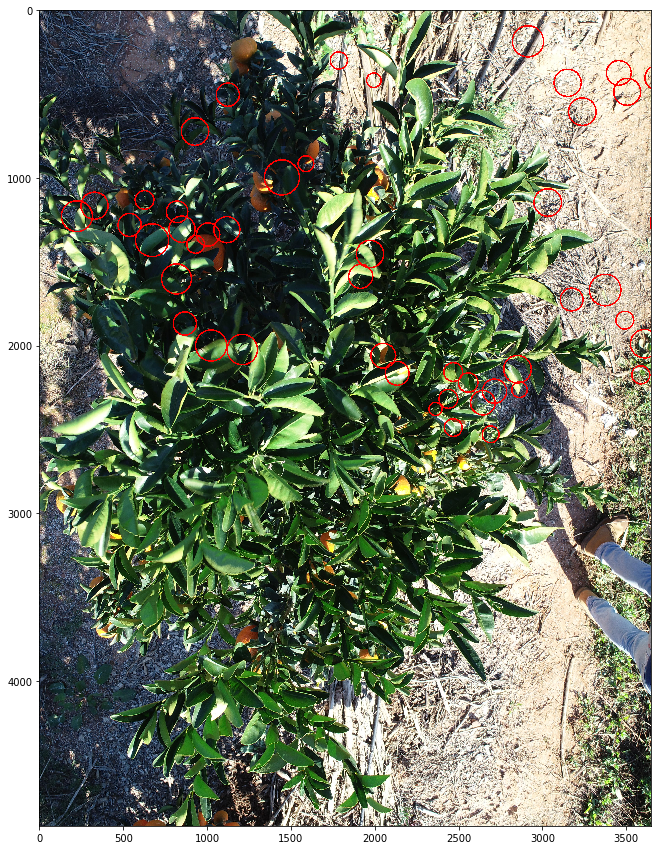

In [27]:
im2=cv.imread("1-10-0010.jpg")
im2=cv.cvtColor(im2,cv.COLOR_BGR2RGB)
pt = np.array(pickle.load(open("1-10-0010.npy","rb")))
#pt=np.array(np.load("1-10-0010.npy",allow_pickle=True))
pts=pt[::, :-1:] 
img = cv.polylines(im2,np.int32(pts),True,(255,0,0),8)
plt.figure(figsize=(15,15))
plt.imshow(img)

In [20]:
img=cv.imread("1-10-0010.jpg")

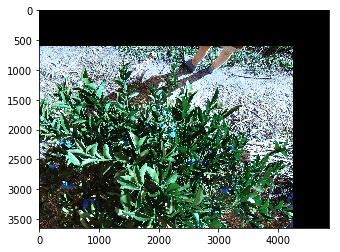

In [21]:
(h, w) = img.shape[:2]
center = (w / 2, h / 2);scale = 1.0;angle90 = 90
# 90 degrees
M = cv.getRotationMatrix2D(center, angle90, scale)
rotated90 = cv.warpAffine(img, M, (h, w))
plt.imshow(rotated90)

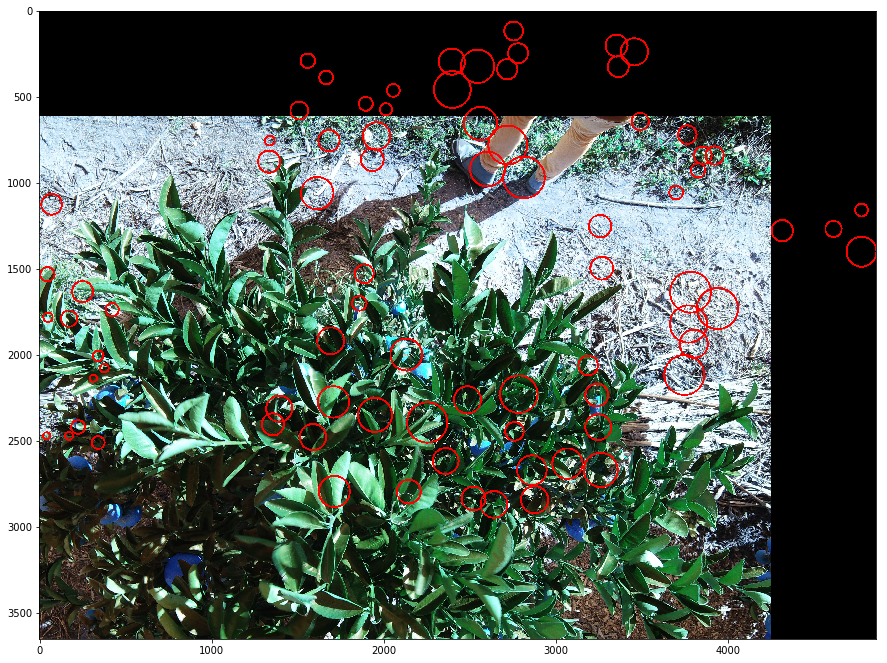

In [22]:
im2=cv.imread("1-49-0049.jpg")
im2=cv.cvtColor(im2,cv.COLOR_BGR2RGB)
(h, w) = img.shape[:2]
center = (w / 2, h / 2);scale = 1.0;angle90 = 90
M = cv.getRotationMatrix2D(center, angle90, scale)
rotated90 = cv.warpAffine(img, M, (h, w))
#plt.imshow(rotated90)
pts = np.array(pickle.load(open("1-49-0049.npy","rb")))
#pts = pts.reshape((-1,1,2))
img = cv.polylines(rotated90,np.int32(pts), isClosed=True,color=(255,0,0),thickness=10)
#img_cvt=cv.cvtColor(img,cv.COLOR_BGR2RGB)
#cv.imwrite('1-49-0049_truth.jpg ', img_cvt)
plt.figure(figsize=(15,15))
plt.imshow(img)